# Imports

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import sys
from math import cos, sin

# Initializing

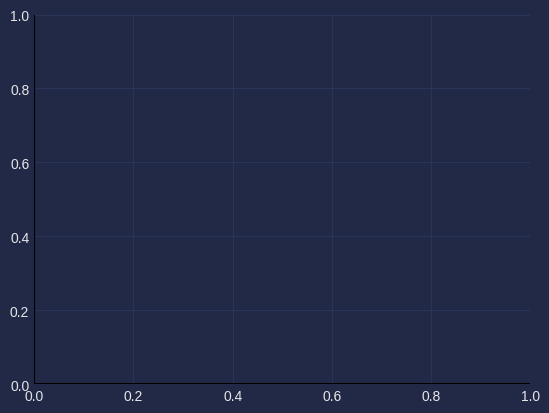

In [ ]:
style_url = r"https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle"
matplotlib.style.use(style_url)
plt.minorticks_on()
plt.grid(True)
plt.axhline(0, color='black')
plt.axvline(0, color='black')

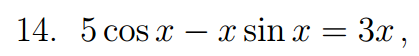

# Calculating

In [ ]:
def fun(x: float) -> float:
  return 5*cos(x) - x*sin(x) - 3*x

def fun1(x: float) -> float:
  return -6*sin(x) - x*cos(x) - 3

def calc(a, b, n, f=fun):
  h = abs(b - a) / n
  x = a
  points = [[], []]
  while x <= b:
    y = f(x)
    points[0].append(x)
    points[1].append(y)
    x += h
  return points

def dif1_2(x, h):
  return (fun(x + h) - fun(x - h)) / (2*h)

def solve_newton(x0, eps=sys.float_info.epsilon):
  x = x0
  xn = x - fun(x) / dif1_2(x, eps)
  while abs(xn - x) >= eps:
    x = xn
    xn = x - fun(x) / dif1_2(x, eps)
  return x

def solve_dichotomy(a, b, eps=sys.float_info.epsilon):
  if fun(a) * fun(b) > 0:
    print('Корней нет или их нечетное количество')
    return
  x = 0
  while abs(b - a) > eps:
    x =  .5 * (a + b)
    if fun(a) * fun(x) < 0:
      b = x
    else:
      a = x
  return x

# Calculated values

In [ ]:
a = -10; b = 10; N = 1e3
eps = 1e-3

x, y = calc(a, b, N)
dih = solve_dichotomy(a, b, eps)
newt = solve_newton(2, .5e-3)

a = 0.5; b = 1.25; N = 1e3
x_, y_ = calc(a, b, N)

# Display

Дихотомия: 0.8636474609375
Метод Ньютона: 0.8637668074337408
Погрешность дихотомии: 0.00015253906250001226
Погрешность метода Ньютона: 3.31925662592214e-05
Погрешность дихотомии больше Ньютона? Да


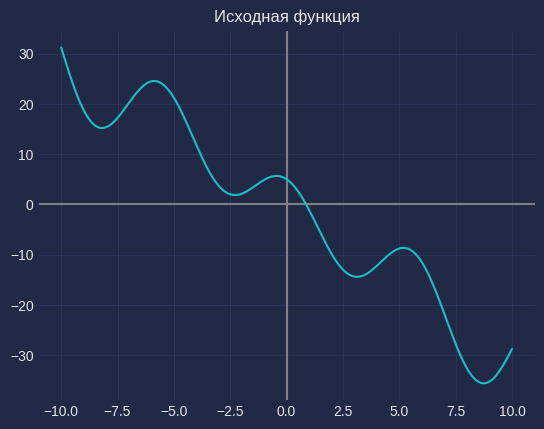

In [ ]:
fig, ax = plt.subplots()
ax.axhline(0, color='gray')
ax.axvline(0, color='gray')
ax.set_title('Исходная функция')
plt.plot(x, y)

res = .8638
print('Дихотомия:', dih)
print('Метод Ньютона:', newt)
print('Погрешность дихотомии:', res - dih)
print('Погрешность метода Ньютона:', res - newt)
print('Погрешность дихотомии больше Ньютона?', "Да" if (res - dih) > (res - newt) else "Нет")

Дихотомия: 0.8636474609375
Метод Ньютона: 0.8637668074337408


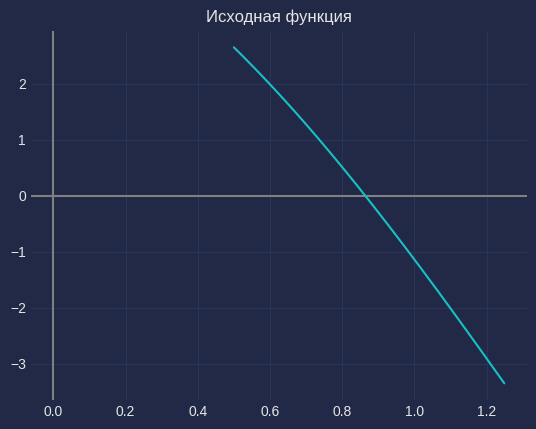

In [ ]:
fig, ax = plt.subplots()
ax.axhline(0, color='gray')
ax.axvline(0, color='gray')
ax.set_title('Исходная функция')
plt.plot(x_, y_)

print('Дихотомия:', dih)
print('Метод Ньютона:', newt)